# Sexually Transmitted Disease Trends in Illinois
## IS 445 Final Project, Fall 2020
### Data Visualization and Report created by: Justin Martin, MS/LIS Student at the University of Illinois at Urbana-Champaign

In [1]:
#import the usual suspects
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bqplot
from matplotlib.ticker import ScalarFormatter

#import interactivity
import ipywidgets
from ipywidgets import Layout, Dropdown, Box, Label
import matplotlib.cm as cm

In [2]:
#bring in the Illinois STD Dataset from the state data repository
IL_all_stds = pd.read_csv("https://data.illinois.gov/dataset/7cb21104-ecea-4e62-a718-b4e8f45038bc/resource/c6aafa99-84d7-4ae7-80cf-9c2af61f89f4/download/idph_std_illinois_by_county_rank.csv")

#bring in the two CDC Datasets extracted from the PDF report
CDC_state_stds = pd.read_excel('CDC_data.xls', sheet_name=0)
CDC_all_stds = pd.read_excel('CDC_data.xls', sheet_name=1, na_values=['NR','—',0])

### STD Rates in the State of Illinois, 2000-2016

Public Health is something that is very much in the news these days, and while COVID-19 data is fun to play with and very relevant, I wanted to work with something a little different. For this analysis, I decided to see how Sexually Transmitted Diseases (STDs) are tracked and trending in Illinois. Over the last two decades, the Illinois Department of Public Health has worked to keep track of STD infections in the state of Illinois. These are tracked by county-level public health districts and then fed to the IDPH for aggregation. This particular visualization connects directly to the IDPH dataset for 2000-2016:

In [13]:
# create a sample plot with the count by year data
count_dict = {"Rate per 100k": 'Rate', "Count of Infections": 'Count'}

@ipywidgets.interact(data_type = count_dict)

def il_std_by_county(data_type):
    il_stds_by_year = IL_all_stds.groupby(['Year']).agg(
        {'Chlamydia_Count': "sum",
         'Gonorrhea_Count': "sum",
         'Early_Syphilis_Count': "sum"
        })
    
    if(data_type == 'Rate'):
        il_stds_by_year = IL_all_stds.groupby(['Year']).agg(
            {'Chlamydia_Rate': "sum",
             'Gonorrhea_Rate': "sum",
             'Early_Syphilis_Rate': "sum"
        })
        data_type_y_label="Rate of Infections Per 100k People (linear scale)"
        data_type_y_scale="linear"
        
    else:
        il_stds_by_year = IL_all_stds.groupby(['Year']).agg(
            {'Chlamydia_Count': "sum",
             'Gonorrhea_Count': "sum",
             'Early_Syphilis_Count': "sum"
        })
        data_type_y_label="Number of Reported Infections (log scale)"
        data_type_y_scale="log"


    ax = il_stds_by_year.plot(kind='line', figsize=(16,10), fontsize=14);

    ax.set_title("Sexually Transmitted Disease Infections by Year in Illinois", fontsize=16)
    ax.set_ylabel(data_type_y_label, fontsize=14)
    ax.set_yscale(data_type_y_scale)
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    
    ax.set_xlabel("Year", fontsize=14)

    plt.show()

interactive(children=(Dropdown(description='data_type', options={'Rate per 100k': 'Rate', 'Count of Infections…

As the data shows, STD infections are overall on the rise in Illinois, with chlamydia experiencing the largest year over year increase since 2000. Gonorrhea has held fairly level, but syphillis has seen fairly strong gains compared to its starting number. With a little more digging, we can see how this data breaks down on a county-by-county basis each year and how STD rates are impacted in our least and most populous counties:

In [3]:
# Dynamic plot of STD Rates in Illinois
disease_dict = {"Rate per 100k": 'Rate', "Count of Infections": 'Count'}

@ipywidgets.interact(county_list=IL_all_stds['COUNTY'].unique(),
                    data_type = disease_dict)

def il_std_by_county(county_list, data_type):
    std_by_county = IL_all_stds.query("(COUNTY==@county_list)")
    
    if(data_type == 'Rate'):
        std_by_county_selected = std_by_county.groupby(['Year']).agg(
        {'Chlamydia_Rate': "mean",
         'Gonorrhea_Rate': "mean",
         'Early_Syphilis_Rate': "mean"
        })
        data_type_y_label="Rate of Infections Per 100k People (linear scale)"
        data_type_y_scale="linear"
        
    else:
        std_by_county_selected = std_by_county.groupby(['Year']).agg(
        {'Chlamydia_Count': "mean",
         'Gonorrhea_Count': "mean",
         'Early_Syphilis_Count': "mean"
        })
        data_type_y_label="Number of Reported Infections (log scale)"
        data_type_y_scale="log"
    
    ax = std_by_county_selected.plot(kind='bar', figsize=(16,10), fontsize=10);
    
    ax.set_title("Sexually Transmitted Disease Infections by Year in Illinois Counties", fontsize=16)
    
    ax.set_ylabel(data_type_y_label, fontsize=14)
    ax.set_yscale(data_type_y_scale)
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    
    ax.set_xlabel("Year", fontsize=14)

    plt.show()

interactive(children=(Dropdown(description='county_list', options=('ADAMS', 'ALEXANDER', 'BOND', 'BOONE', 'BRO…

### National STD Trends, 1940-2016

After seeing the growing rates in Illinois, I was curious how that stacks up against national rates. The [Centers for Disease Control and Prevention](https://www.cdc.gov) is a federal agency that tracks, among many things, rates and counts of Sexually Transmitted diseases and has maintained a dataset dating back to 1940 on the four major STDs. The CDC unfortunately does not maintan easy access to the raw datasets, but I was able to pull tables from the report using a combination of Adobe Acrobat to isolate the pages with the tables I needed and then passing those extracted PDF files through the [Zamzar Online File Conversion Utility](https://www.zamzar.com/convert/pdf-to-csv/). However once that was complete, I was able to recreate some of the charts found in the report.

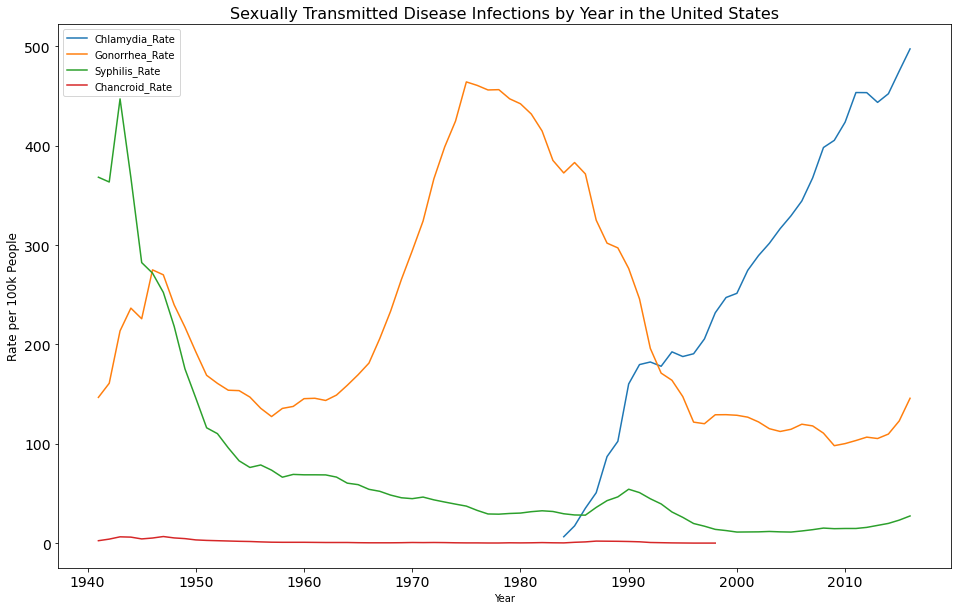

In [16]:
# Plot rates by year for all four major diseases

CDC_all_stds_selected = CDC_all_stds.groupby(['Year']).agg(
        {'Chlamydia_Rate': "mean",
         'Gonorrhea_Rate': "mean",
         'Syphilis_Rate': "mean",
         'Chancroid_Rate': "mean"
        })

ax = CDC_all_stds_selected.plot(kind='line', figsize=(16,10), fontsize=14);

ax.set_ylabel("Year", fontsize=12)

ax.set_title("Sexually Transmitted Disease Infections by Year in the United States", fontsize=16)

ax.set_ylabel("Rate per 100k People", fontsize=12)
ax.set_yscale("linear")
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()

What I found interesting is that for a period of time in the 1950s and again from the early-1970s to the late 1980s, most STDs were trending downward even as our national population was increasing. Chancroid is a disease that for all intents and purposes has been eradicated in the United States since the late 1990s, as fewer than 100 individuals per year are infected with it. However, there is an alarming trend of chlamydia being on a very rapid rise with no sign of abating. Gonorrhea, after being on a downslide from the early 1970 has seen a sharp uptick in the mid-2010, and syphilis is also on a slow-growing rise since the early 2000s. This matches the trends shown in Illinois, so it is heartening (but also disappointing) to see that we are on track with everyone else.

### National STD Rankings, 2012-16

I was additionally interested in seeing how Illinois, the fifth or sixth most populous state in the union (depending on when you are counting), stacked up against other states. Using the same report as above and the same extraction tool, I pulled the tables relating to the three major diseases and compared their raw counts and rate by population.

In [15]:
year_dict = {"2012": '2012', "2013": '2013', "2014": '2014', "2015": '2015', "2016": '2016'}
disease_dict = {"Chlamydia": '_chla', "Gonorrhea": '_gono', "Syphillis": '_syph'}
type_dict = {"Rate per 100k": '_rate', "Count of Infections": '_count'}

@ipywidgets.interact(sel_year = year_dict, sel_disease = disease_dict, sel_data_type = type_dict)

def natl_std_rankings(sel_year, sel_disease, sel_data_type):
    
    data_col_selected = sel_year + sel_disease + sel_data_type
    
    CDC_state_stds_selected = CDC_state_stds.groupby(['State']).agg(
        {data_col_selected: "mean"}).sort_values(by=data_col_selected, ascending="False")
    
    ax = CDC_state_stds_selected.plot(kind='barh', figsize=(16,20), fontsize=14);
    
    ax.set_title("Sexually Transmitted Disease Infection Rates by States", fontsize=16)

    ax.set_xlabel("Rate of Infections Per 100k People (linear scale)", fontsize=12)
    ax.set_xscale("linear")
    ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

    ax.set_ylabel("State", fontsize=12)

    plt.show()

interactive(children=(Dropdown(description='sel_year', options={'2012': '2012', '2013': '2013', '2014': '2014'…

Is is no surprise that when you compare just on raw numbers that the most populous states are the ones on top. The more accurate metric is the rate per 100,000 people. When we switch our data to that view, we see that Illinois is still not in great shape with STDs, as it continues to be in the top ten for chlamydia and the top 15 for gonorrhea and syphillis. However, as a proportion of the population, this is a far sight better than states who are significantly smaller in population.

#### Works Cited
* IDPH STD Illinois By County Rank - Data.Illinois.Gov. https://data.illinois.gov/dataset/453idph_std_illinois_by_county_rank. Accessed 15 April 2021.
* Sexually Transmitted Disease Surveillance 2016 - CDC.gov. https://www.cdc.gov/std/stats16/CDC_2016_STDS_Report-for508WebSep21_2017_1644.pdf. 2016, p. 164. Accessed 6 May 2021.